In [1]:
import pandas as pd

In [2]:
shops = pd.read_csv('shops.csv')
sales = pd.read_csv('Sales.csv')
events = pd.read_csv('Events.csv')

In [3]:
shops = pd.read_csv("Shops.csv", sep=';')
sales = pd.read_csv("Sales.csv", sep=';')
events = pd.read_csv("Events.csv", sep=';')

In [4]:
# Розмір датасетів
print("Shops:", shops.shape)
print("Sales:", sales.shape)
print("Events:", events.shape)

# Перші кілька рядків для перегляду структури даних
print(shops.head())
print(sales.head())
print(events.head())

Shops: (35, 9)
Sales: (29425, 4)
Events: (18, 4)
   Shop   Open_date Change_type Trade_area    City   Region  \
0     1  04.10.2018         NaN      36,04  City15  Region1   
1     1  20.12.2021   Extension      48,05  City15  Region1   
2     2  12.01.2018         NaN      30,93   City8  Region2   
3     3  16.02.2018         NaN      36,94  City27  Region3   
4     4  22.01.2018         NaN      17,42   City7  Region4   

           City area             Local_reference  Floor  
0  sleeping quarters                      bazaar      1  
1  sleeping quarters                      bazaar      1  
2          periphery                 supermarket      1  
3             centre  administrative institution      1  
4  sleeping quarters                 supermarket      1  
   Shop        Date     Sales  Unnamed: 3
0     1  02.01.2019  4 739,45         NaN
1     2  02.01.2019  6 254,80         NaN
2     3  02.01.2019  8 710,77         NaN
3     4  02.01.2019  4 389,85         NaN
4     5  02.01

In [5]:
print("Пропуски в Shops:")
print(shops.isnull().sum())
print("\nПропуски в Sales:")
print(sales.isnull().sum())
print("\nПропуски в Events:")
print(events.isnull().sum())

Пропуски в Shops:
Shop                0
Open_date           0
Change_type        30
Trade_area          0
City                0
Region              0
City area           0
Local_reference     0
Floor               0
dtype: int64

Пропуски в Sales:
Shop              0
Date              0
Sales             0
Unnamed: 3    29425
dtype: int64

Пропуски в Events:
Date_start    0
Date_end      0
Type          0
Event         0
dtype: int64


In [6]:
sales = sales.dropna(axis=1, how='all')

In [7]:
print("Пропуски в Shops:")
print(shops.isnull().sum())
print("\nПропуски в Sales:")
print(sales.isnull().sum())
print("\nПропуски в Events:")
print(events.isnull().sum())

Пропуски в Shops:
Shop                0
Open_date           0
Change_type        30
Trade_area          0
City                0
Region              0
City area           0
Local_reference     0
Floor               0
dtype: int64

Пропуски в Sales:
Shop     0
Date     0
Sales    0
dtype: int64

Пропуски в Events:
Date_start    0
Date_end      0
Type          0
Event         0
dtype: int64


In [8]:
# Применение условия для аномальных значений
# Преобразуем столбец 'Date' в datetime, если еще не сделано
sales['Date'] = pd.to_datetime(sales['Date'], format='%d.%m.%Y')

# Добавляем новый столбец 'Year', который будет содержать только год
sales['Year'] = sales['Date'].dt.year

# Теперь можно разделить DataFrame по годам
years = sales['Year'].unique()  # Получаем уникальные годы

# Разделим DataFrame по каждому году
sales_by_year = {year: sales[sales['Year'] == year] for year in years}

# Например, выводим данные для 2020 года
print(sales_by_year[2020])



      Shop       Date      Sales  Year
2398     1 2020-01-02   5 448,20  2020
2399     2 2020-01-02   9 722,53  2020
2400     3 2020-01-02  14 940,39  2020
2401     4 2020-01-02   2 776,43  2020
2402     5 2020-01-02   7 713,36  2020
...    ...        ...        ...   ...
6739    10 2020-12-31  21 873,30  2020
6740    11 2020-12-31  13 511,77  2020
6741    12 2020-12-31  20 069,73  2020
6742    13 2020-12-31  24 026,61  2020
6743    14 2020-12-31  21 962,58  2020

[4346 rows x 4 columns]


In [9]:
print(sales.isna().sum())

Shop     0
Date     0
Sales    0
Year     0
dtype: int64


In [10]:
print(sales_by_year[2019])

      Shop       Date      Sales  Year
0        1 2019-01-02   4 739,45  2019
1        2 2019-01-02   6 254,80  2019
2        3 2019-01-02   8 710,77  2019
3        4 2019-01-02   4 389,85  2019
4        5 2019-01-02   5 119,37  2019
...    ...        ...        ...   ...
2393     5 2019-12-31  14 136,12  2019
2394     6 2019-12-31  16 664,72  2019
2395     7 2019-12-31  13 456,91  2019
2396     8 2019-12-31  21 616,52  2019
2397     9 2019-12-31  11 502,55  2019

[2398 rows x 4 columns]


In [11]:
shops_before_2023 = shops[shops['Open_date'] < '2023-01-01']

In [12]:
shops_before_2023.to_csv('shops_before_2023.csv', index=False)

In [13]:
shops_after_2023 = shops[shops['Open_date'] >= '2023-01-01']
shops_after_2023.to_csv('shops_after_2023.csv', index=False)

In [14]:
import matplotlib.pyplot as plt

In [21]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d.%m.%Y')

# Удаление лишних пробелов и замена запятых на точки в столбце Sales
sales['Sales'] = sales['Sales'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Добавление столбца с месяцами
sales['Month'] = sales['Date'].dt.to_period('M')

# Суммирование продаж по месяцам
monthly_sales = sales.groupby('Month')['Sales'].sum().reset_index()

# Преобразование в удобочитаемую таблицу
monthly_sales.columns = ['Month', 'Total_Sales']

# Вывод результата
print(monthly_sales)

      Month  Total_Sales
0   2019-01    999338.08
1   2019-02   1052095.16
2   2019-03   1214180.49
3   2019-04   1305111.94
4   2019-05   1257564.80
5   2019-06   1288016.78
6   2019-07   1624118.43
7   2019-08   2264778.39
8   2019-09   1768462.88
9   2019-10   2143593.07
10  2019-11   2415984.91
11  2019-12   3372754.01
12  2020-01   2356515.49
13  2020-02   2835946.76
14  2020-03   2078102.78
15  2020-04   1845266.11
16  2020-05   2617420.05
17  2020-06   2639748.52
18  2020-07   3250420.46
19  2020-08   4608432.15
20  2020-09   3712320.20
21  2020-10   4098131.15
22  2020-11   3986703.74
23  2020-12   6124777.29
24  2021-01   2928658.61
25  2021-02   3928222.53
26  2021-03   4390192.81
27  2021-04   4001960.42
28  2021-05   4213765.10
29  2021-06   4590004.63
30  2021-07   5255708.60
31  2021-08   6708555.01
32  2021-09   5488795.48
33  2021-10   5887138.93
34  2021-11   5959133.45
35  2021-12   8353474.80
36  2022-01   5760245.30
37  2022-02   5269089.95
38  2022-03   5627711.71


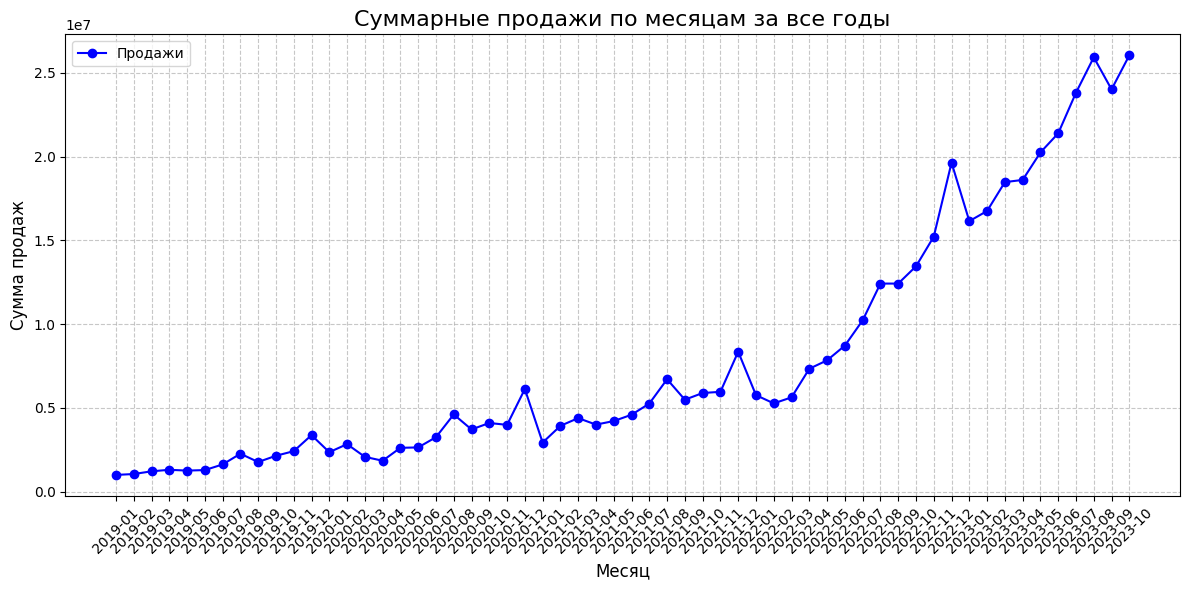

In [33]:
# Преобразуем периоды в строки для подписи на графике
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales'], marker='o', color='blue', label='Продажи')

# Настройки графика
plt.title('Суммарные продажи по месяцам за все годы', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Сумма продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Показ графика
plt.show()

In [36]:
!pip install prophet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from prophet import Prophet

In [43]:
df = sales_2019[['Month', 'Total_Sales']].rename(columns={'Month': 'ds', 'Total_Sales': 'y'})

# Просмотр первых строк для проверки
df.head()

,ds,y
0,2019-01,999338.08
1,2019-02,1052095.16
2,2019-03,1214180.49
3,2019-04,1305111.94
4,2019-05,1257564.80


In [44]:
# Создание модели Prophet
model = Prophet()

# Обучение модели на данных
model.fit(df)

23:50:17 - cmdstanpy - INFO - Chain [1] start processing
23:50:17 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future_dates = model.make_future_dataframe(df, periods=30, freq='D')  # Прогнозируем на 30 дней

# Прогнозирование
forecast = model.predict(future_dates)

# Просмотр результатов прогноза
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

In [46]:
df.head()

,ds,y
0,2019-01,999338.08
1,2019-02,1052095.16
2,2019-03,1214180.49
3,2019-04,1305111.94
4,2019-05,1257564.80
